
# Indian Premier League (IPL)  Exploratory Data Analysis

**The Indian Premier League (IPL) is a professional Twenty20 cricket league in India started in 2008.**

## 1. Import Libraries 

In [62]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 2. Import Data 

In [63]:
deliveries = pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')
matches = pd.read_csv('IPL Matches 2008-2020.csv')

In [64]:
matches.head(5)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [65]:
deliveries.head(5)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [66]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [67]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

## 3. Cleaning the Data 

**Check team names**

In [68]:
matches['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

**Replace full team names with their respective short forms**

In [69]:
team_names = matches['team1'].unique()
team_names_abv = ["RCB","KXIP","DD","MI","KKR","RR","DCH","CSK","KKR","PWI","SRH","GL","RPS","RPS","DC"]
matches.replace(team_names,team_names_abv,inplace = True)

**Check match venues**

In [70]:
matches['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

**Replace repeated venue names with single standard name**

In [71]:
venues = matches['venue'].unique()
venues_abv = ["Chinnaswamy","Mohali","Feroz Shah Kotla","Wankhede","Eden Gardens","Sawai Mansingh","Rajiv Gandhi Stadium",
 "MA Chidambaram","DY Patil","Newlands","St George's Park","Kingsmead","SuperSport","Buffalo Park","New Wanderers",
"Diamond Oval","OUTsurance Oval","Brabourne","Motera","Barabati","Vidarbha","Himachal Pradesh","Nehru Stadium",
"Holkar","ACA-VDCA","Sahara Stadium","Shaheed Veer Stadium","JSCA","Sheikh Zayed","Sharjah","Dubai Stadium",
"MCA Stadium","Mohali","Saurashtra Stadium","Green Park","Chinnaswamy"]
matches.replace(venues,venues_abv,inplace = True)

## 4. Fill missing values 

In [72]:
matches.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

**Fill city names**

In [73]:
def fill_city_name(data):
    city = data[0]
    venue = data[1]
    if pd.isnull(city):
        return venue.split()[0]
    else:
        return city

In [74]:
matches['city'] = matches[['city','venue']].apply(fill_city_name,axis=1)

**Fill missing result margin with avg margin**

In [75]:
df  = matches.groupby('winner').mean()['result_margin']

In [76]:
def fill_result_margin(data):
    result_margin = data[0]
    winner = data[1]
    
    if pd.isnull(result_margin) and not pd.isnull(winner):
        return df[winner]
    else:
        return result_margin

In [77]:
matches['result_margin'] = matches[['result_margin','winner']].apply(fill_result_margin,axis=1)

**Method column not much usefull..drop it**

In [78]:
matches.drop('method',axis=1,inplace=True)

In [79]:
matches.dropna(inplace=True)

In [80]:
matches.isnull().sum()

id                 0
city               0
date               0
player_of_match    0
venue              0
neutral_venue      0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
eliminator         0
umpire1            0
umpire2            0
dtype: int64

**No null values**



# 5. Exploratory Data Analysis 

## 1. Venues with most IPL matches (TOP10)

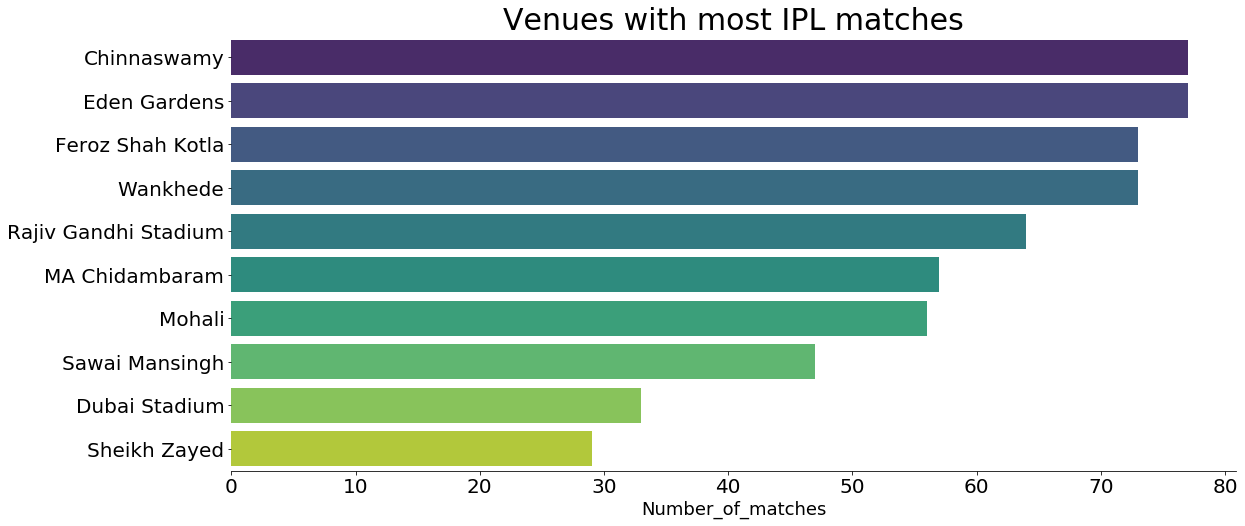

In [81]:
d = pd.DataFrame(matches['venue'].value_counts().head(10).reset_index(level=0))
plt.figure(figsize=(18,8))
sns.barplot(x='venue',y='index',data=d,palette = 'viridis')
plt.title('Venues with most IPL matches',fontsize=30)
plt.xlabel('Number_of_matches',fontsize=18)
plt.xticks(fontsize=20)
plt.ylabel(None)
plt.yticks(fontsize=20)
sns.despine(left=True)

## 2. Toss decision across IPL

(array([0, 1]), <a list of 2 Text xticklabel objects>)

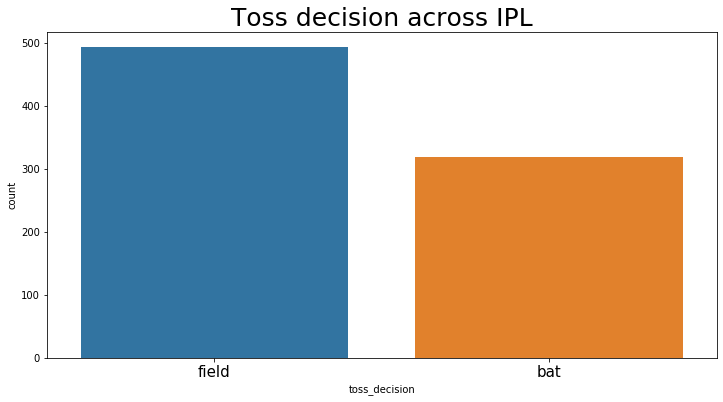

In [82]:
plt.figure(figsize=(12,6))
sns.countplot(x='toss_decision',data=matches)
plt.title('Toss decision across IPL',fontsize=25)
plt.xticks(fontsize=15)

## 3. Number of times toss won by each team

Text(0, 0.5, 'Count')

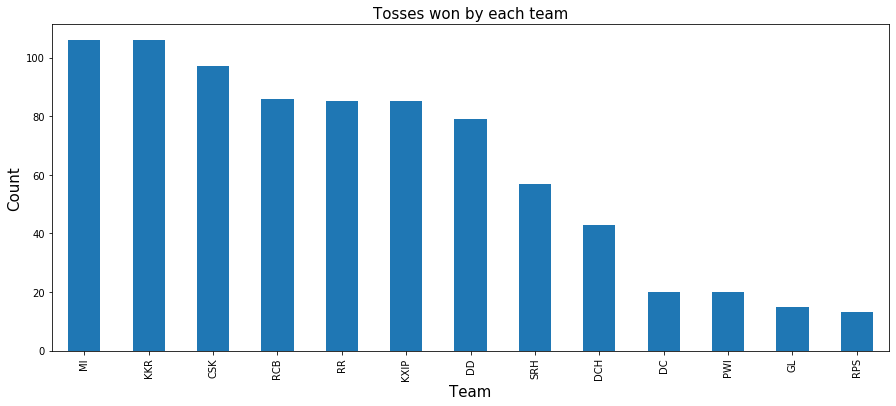

In [83]:
plt.figure(figsize=(15,6))
matches['toss_winner'].value_counts().plot(kind='bar')
plt.title('Tosses won by each team',fontsize=15)
plt.xlabel('Team',fontsize=15)
plt.ylabel('Count',fontsize=15)

## 4. Toss decision by each team

Text(0.5, 1.0, 'Toss decision by each team')

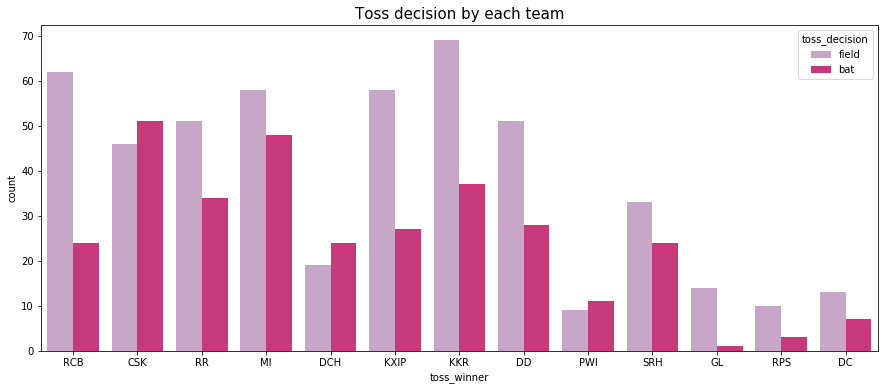

In [84]:
plt.figure(figsize=(15,6))
sns.countplot(x='toss_winner',data=matches,hue='toss_decision',palette='PuRd')
plt.title('Toss decision by each team',fontsize=15)

## 5.  Matches won by each team

Text(0.5, 1.0, 'Matches won by IPL teams')

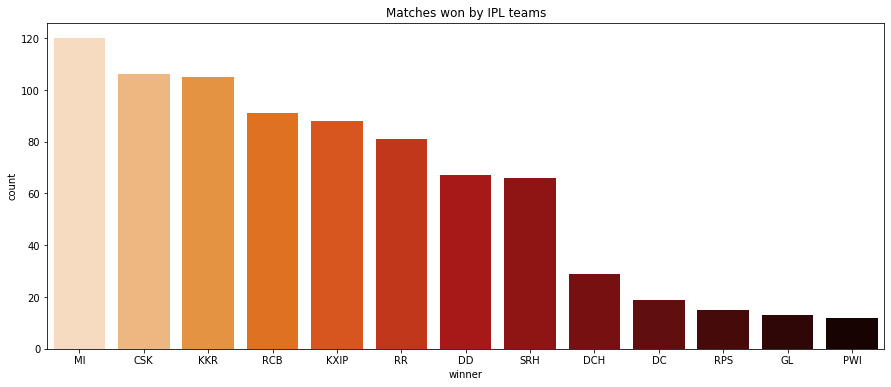

In [85]:
plt.figure(figsize=(15,6))
sns.countplot('winner',data=matches,order = matches['winner'].value_counts().index,palette='gist_heat_r')
plt.title('Matches won by IPL teams')

## 6. Matches won after winning the toss (toss_win success ratio)

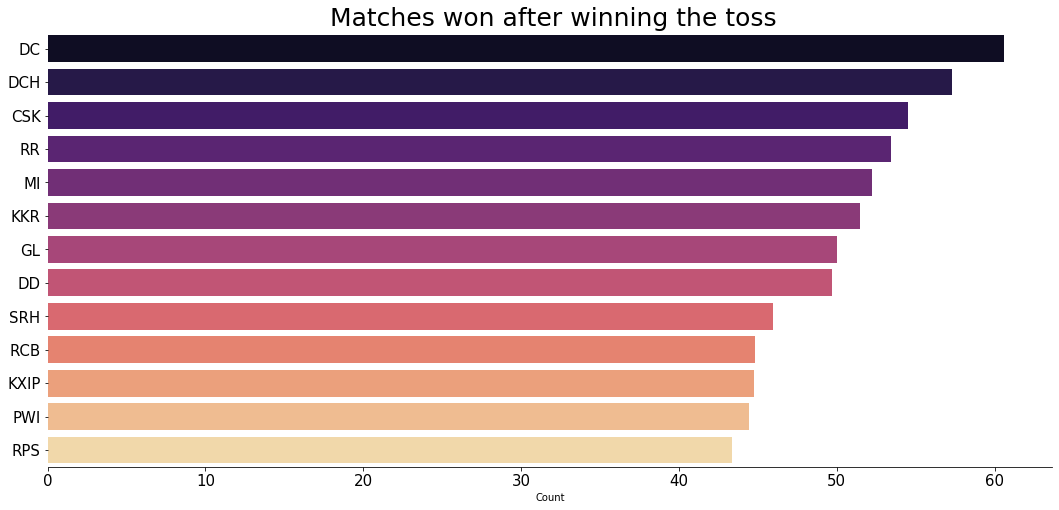

In [86]:
Total_matches = matches['team1'].value_counts() + matches['team2'].value_counts()
toss_won = matches['toss_winner'].value_counts()
toss_win_success_rate = (toss_won/Total_matches)*100
toss_win_success_rate = toss_win_success_rate.sort_values(ascending = False)
rate = pd.DataFrame(toss_win_success_rate,columns=['toss/win'])
rate.reset_index(level=0,inplace=True)
rate.columns = ['team','toss_win_rate']

plt.figure(figsize=(18,8))
sns.barplot(y='team',x='toss_win_rate',data=rate,palette='magma')
plt.title(' Matches won after winning the toss',fontsize=25)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Count')
plt.ylabel(None)
sns.despine(left=True)

## 7. Umpires with most matches officiated (TOP 10)

In [87]:
data = pd.DataFrame({"umpire":matches["umpire1"].tolist() + matches["umpire2"].tolist()},columns=['umpire'])

Text(0, 0.5, 'No_of_matches')

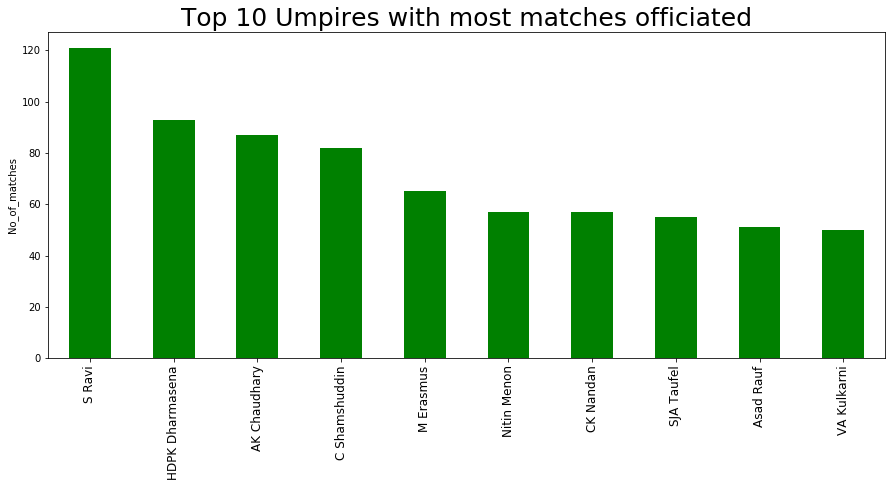

In [88]:
plt.figure(figsize=(15,6))
data['umpire'].value_counts().head(10).plot(kind='bar',color='green')
plt.title('Top 10 Umpires with most matches officiated',fontsize=25)
plt.xlabel(None)
plt.xticks(fontsize=12)
plt.ylabel('No_of_matches')

## 8. Plyaers with most MOM awards (TOP 10) 

Text(0, 0.5, 'MoM_Count')

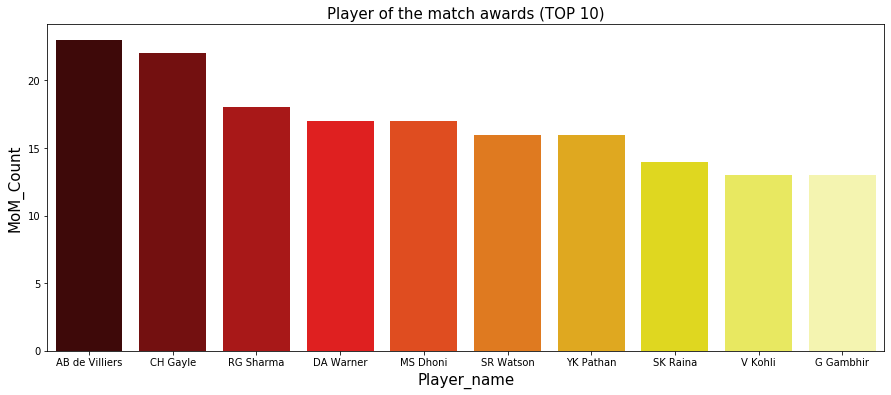

In [89]:
plt.figure(figsize=(15,6))
m= pd.DataFrame(matches['player_of_match'].value_counts().head(10).reset_index(level=0))
sns.barplot(data=m,x='index',y='player_of_match',palette='hot')
plt.title('Player of the match awards (TOP 10)',fontsize=15)
plt.xlabel('Player_name',fontsize=15)
plt.ylabel('MoM_Count',fontsize=15)

## 9. Batsman with most runs in IPL (TOP10)

In [90]:
tot_runs=deliveries.groupby('batsman').apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Runs')

Text(0.5, 1.0, 'Most runs in IPL (TOP 10)')

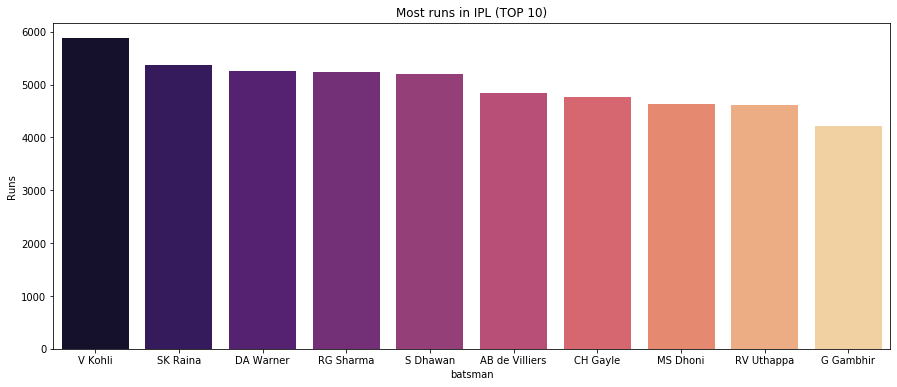

In [91]:
df2 = tot_runs.sort_values('Runs',ascending=False).head(10)

plt.figure(figsize=(15,6))
sns.barplot(x='batsman',y='Runs',data=df2,palette='magma')
plt.title('Most runs in IPL (TOP 10)')


## 10. Bowler with most wickets in IPL (TOP 10)

Text(0, 0.5, 'No_of_wickets')

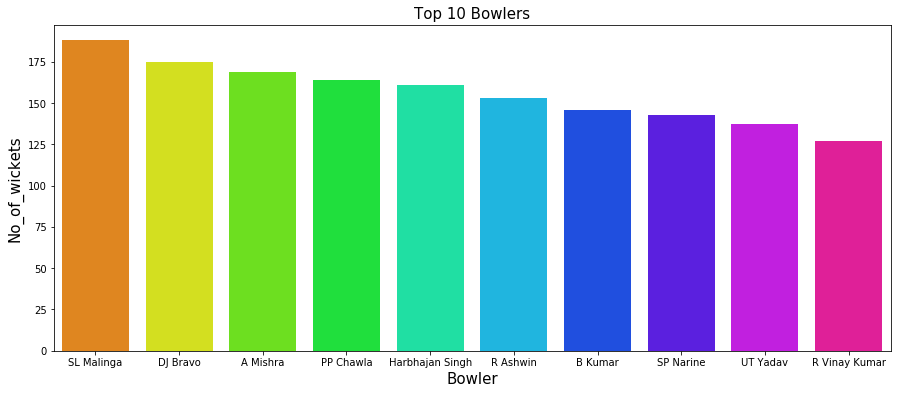

In [92]:
plt.figure(figsize=(15,6))
df4 = pd.DataFrame(deliveries[deliveries['is_wicket']==1]['bowler'].value_counts().head(10).reset_index(level=0))
sns.barplot(data=df4,x='index',y='bowler',palette='hsv')
plt.title('Top 10 Bowlers',fontsize=15)
plt.xlabel('Bowler',fontsize=15)
plt.ylabel('No_of_wickets',fontsize=15)

## 11 Dismissal Kind

Text(0.5, 1.0, 'Dismissal kind across IPL')

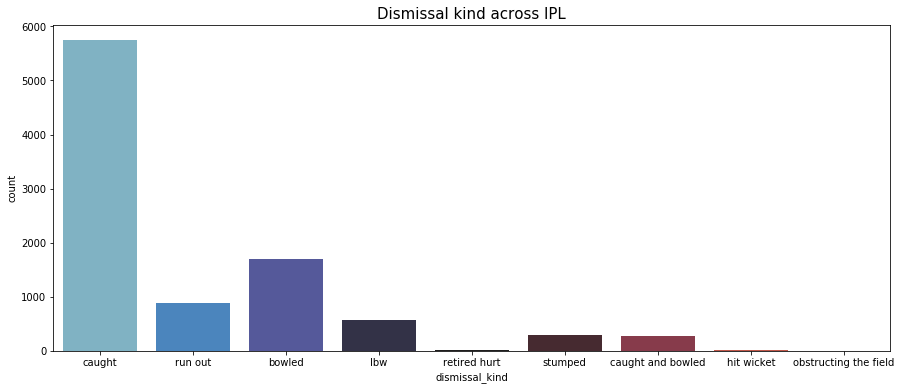

In [93]:
plt.figure(figsize=(15,6))
sns.countplot(x='dismissal_kind', data=deliveries,palette='icefire')
plt.title('Dismissal kind across IPL',fontsize=15)

## 12. Top 10 fielders in IPL (including WK)

Text(0, 0.5, 'No_of_catches')

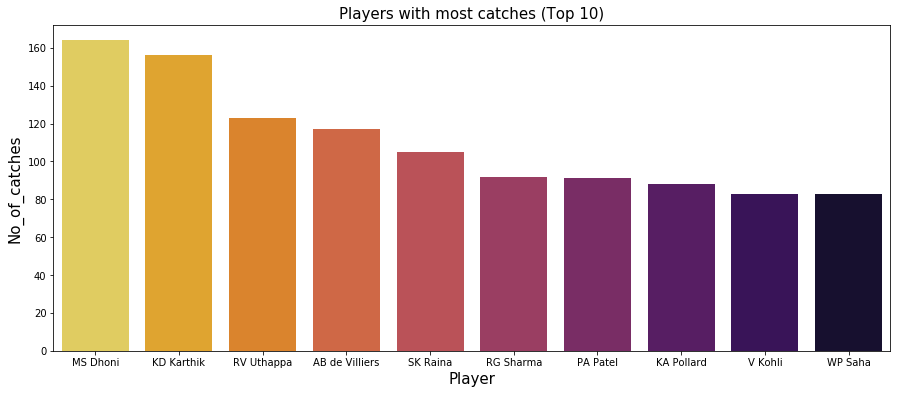

In [94]:
df3 = pd.DataFrame(deliveries['fielder'].value_counts().head(10).reset_index(level=0))
plt.figure(figsize=(15,6))
sns.barplot(data=df3,x='index',y='fielder',palette='inferno_r')
plt.title('Players with most catches (Top 10)',fontsize=15)
plt.xlabel('Player',fontsize=15)
plt.ylabel('No_of_catches',fontsize=15)

## 13. Teams success rate across IPL (result_margin)

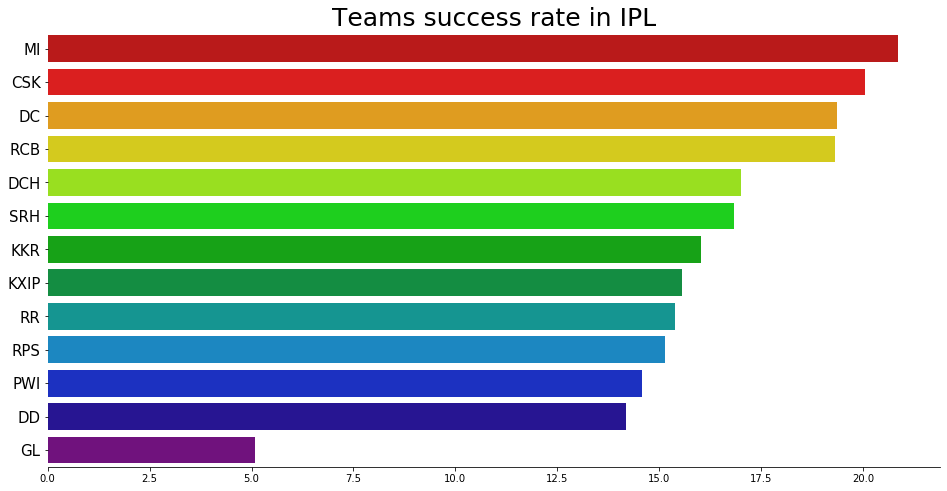

In [95]:
df5 = pd.DataFrame(matches.groupby('winner').mean()['result_margin'].sort_values(ascending=False).reset_index(level=0))
plt.figure(figsize=(16,8))
sns.barplot(y='winner',x='result_margin',data=df5,palette='nipy_spectral_r')
plt.title('Teams success rate in IPL',fontsize=25)
plt.xlabel(None)
plt.ylabel(None)
plt.yticks(fontsize=15)
sns.despine(left=True)

# Thank You